<a href="https://colab.research.google.com/github/AustinMoore032/Stat-class/blob/main/Austin_Moore_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils #All of this code is setup and allows future code to understand what it is supposed to do easier.
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [3]:
def GPU(data): #defining data to return this action
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #Defining plot x
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #creating the code that will grab the slides from the google slides url later
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): #code to load and display the image on slides

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #labels = the code provided now there are 1000 guesses as to what is in the image
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [5]:
url = "https://docs.google.com/presentation/d/1GBWxgULrLetFnvHqvfA0gQzjeZZwuqb0Qa6hojs-1U8/edit#slide=id.g1ad95b1f627_0_146" #my google slides

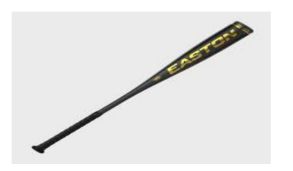

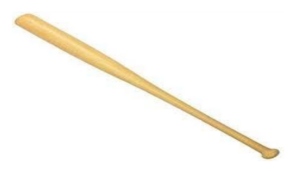

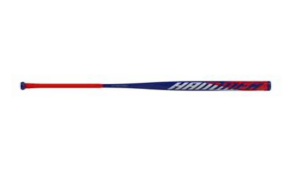

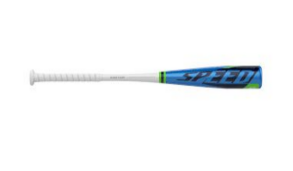

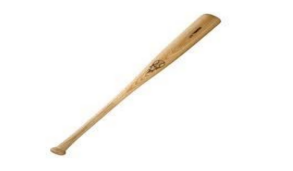

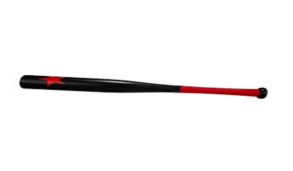

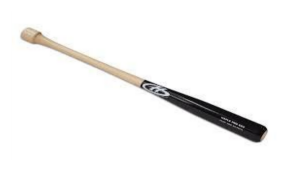

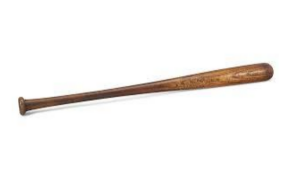

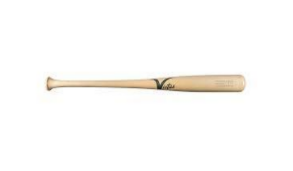

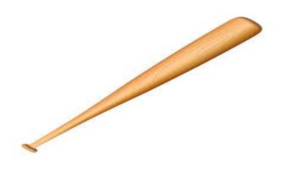

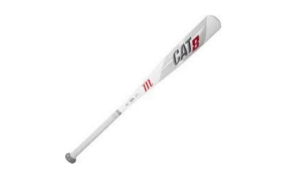

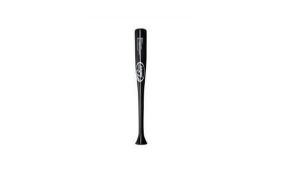

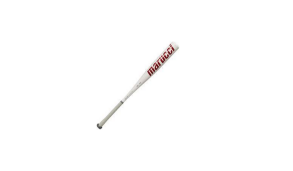

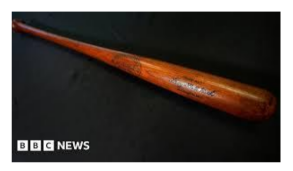

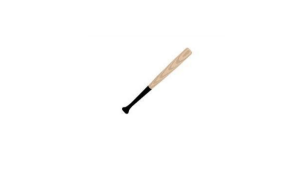

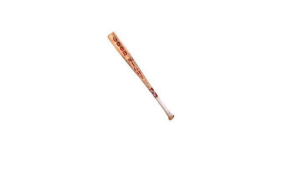

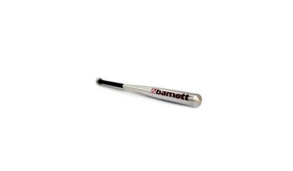

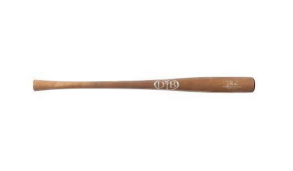

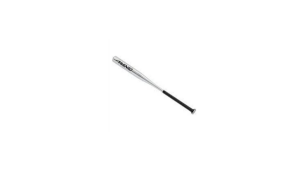

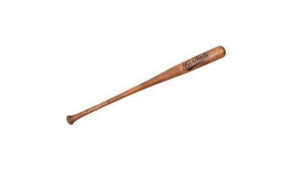

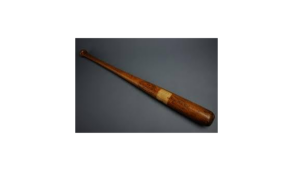

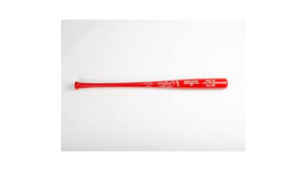

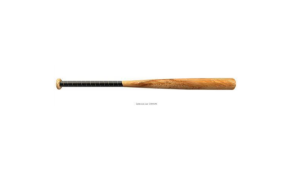

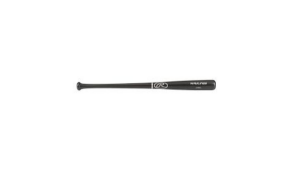

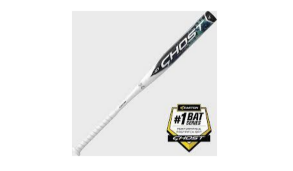

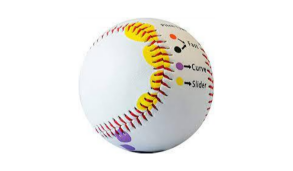

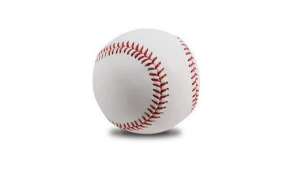

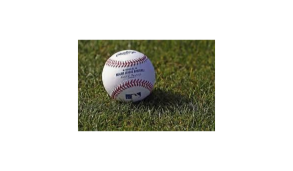

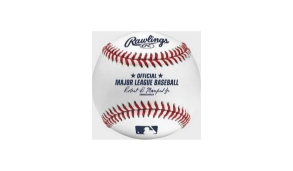

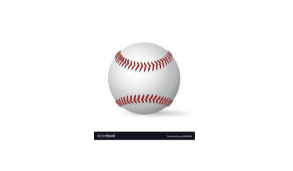

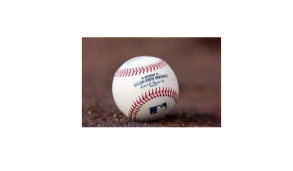

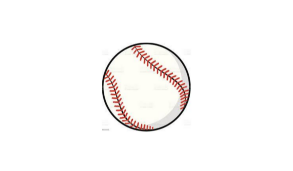

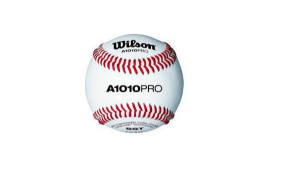

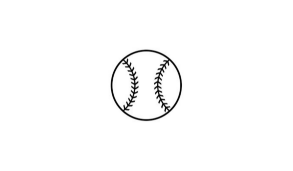

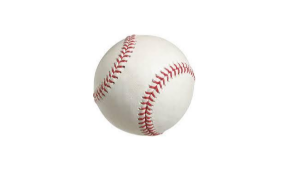

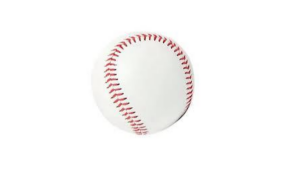

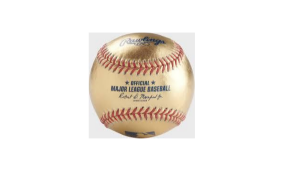

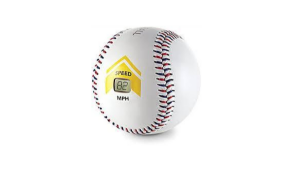

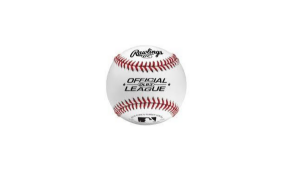

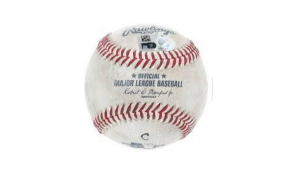

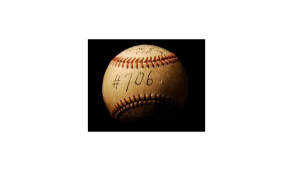

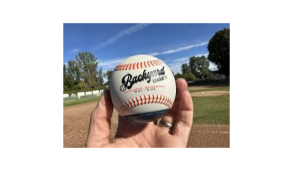

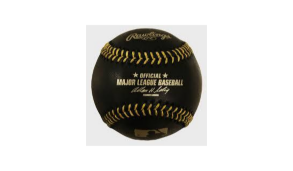

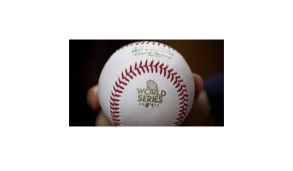

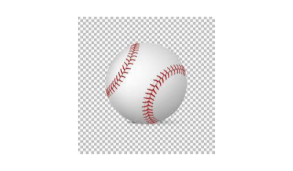

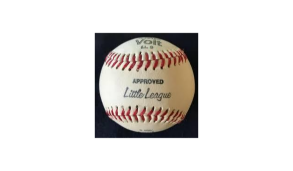

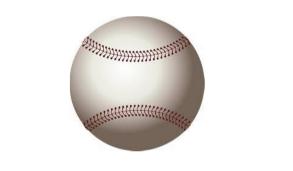

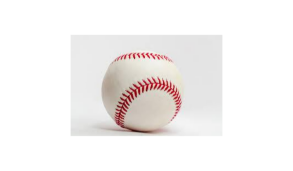

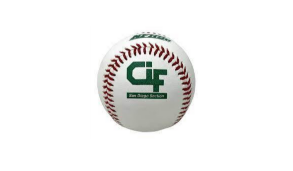

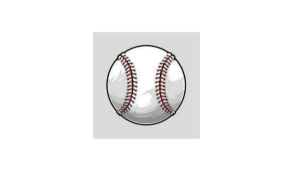

In [6]:
images = [] #loads images from url above and displays them

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [12]:
images.shape #displays what the image size is set too

torch.Size([50, 3, 224, 224])

In [13]:
model(images) #i think this is numbers regarding the images

tensor([[-0.6545, -2.0535, -2.8902,  ..., -4.6914,  2.8331,  0.3324],
        [-1.7505,  0.1960, -3.0949,  ..., -2.1357,  3.2989, -0.4847],
        [ 0.3950, -0.1993, -3.5003,  ..., -5.3848,  2.5244,  0.0689],
        ...,
        [-0.9820,  3.9295,  6.4531,  ..., -3.6466,  1.8678,  6.1080],
        [-2.4632,  2.1413,  6.4712,  ..., -1.8940,  1.3146,  6.2289],
        [-3.1381, -1.3399, -0.5573,  ..., -4.0010, -0.4001,  4.8709]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [14]:
y = model(images) #Setting y equal too the image model numbers

In [15]:
y.shape #displays what image size is set too for y

torch.Size([50, 1000])

In [17]:
guesses = torch.argmax(y, 1).cpu().numpy() #sets guesses equal to picture number

In [18]:
for i in list(guesses): #list of guesses as to what the piture is
    print(labels[i])

reel
hammer
ladle
screwdriver
drumstick
shovel
paintbrush
wooden spoon
hatchet
hatchet
ballpoint, ballpoint pen, ballpen, Biro
nail
syringe
hatchet
nail
broom
ballpoint, ballpoint pen, ballpen, Biro
hatchet
nail
wooden spoon
letter opener, paper knife, paperknife
hatchet
hammer
shovel
letter opener, paper knife, paperknife
baseball
baseball
golf ball
baseball
baseball
baseball
baseball
baseball
loupe, jeweler's loupe
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
combination lock
baseball
baseball
baseball
baseball
baseball
baseball
lighter, light, igniter, ignitor


In [21]:
Y = np.zeros(50,) #sets first 25 equal to 0 for y and second 25 equal to 1
Y[25:] = 1

In [22]:
Y #displays array for y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
X = y.detach().cpu().numpy() #code for x

In [25]:
X.shape #displays size of image for x

(50, 1000)

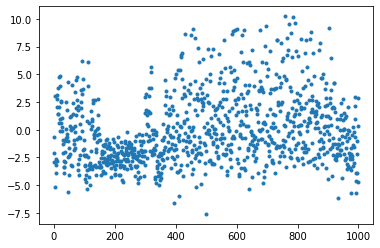

In [27]:
plt.plot(X[0],'.') #this is the plot of x

In [29]:
X[0] #outcomes of y when x is set to 0

array([-6.54535711e-01, -2.05347300e+00, -2.89017415e+00, -5.18277550e+00,
       -2.86530590e+00,  3.03599668e+00, -3.15403509e+00, -3.94150281e+00,
       -2.61848855e+00, -2.80762291e+00,  3.12513089e+00,  2.77557898e+00,
        2.06069946e+00,  1.44571137e+00,  3.72300386e+00,  1.41136801e+00,
        4.74728537e+00,  5.87215722e-01,  2.04263234e+00,  9.49155331e-01,
       -7.17064142e-02,  3.94678926e+00,  4.81217289e+00,  5.66573679e-01,
        2.62562895e+00,  2.53174138e+00,  2.22214937e-01, -1.03357196e-01,
        1.10188937e+00, -9.10019815e-01, -2.12005520e+00, -1.25919676e+00,
       -2.84222770e+00, -3.90695906e+00, -3.38710737e+00, -3.33296680e+00,
       -2.04664373e+00, -2.95087719e+00, -1.05020928e+00, -7.27510273e-01,
        3.55592966e-02,  2.47912812e+00, -6.68422818e-01,  1.78266931e+00,
       -3.94571602e-01, -2.44816303e+00, -9.95464325e-01,  4.29431391e+00,
       -5.59222603e+00, -4.04563046e+00, -2.40717983e+00, -1.64008391e+00,
        3.49547863e-01,  

In [30]:
np.argmax(X[0]) #displays very first images guess which happens to be 758 on the chart

758

In [32]:
labels[948] #Shows what label number 948 is of the 1000.

'Granny Smith'

In [33]:
top_ten = np.argsort(X[0])[::-1][0:10] #code to setup displaying top 10 guesses

In [34]:
for i in top_ten: #code for actually displaying the top 10 guesses
    print(labels[i])

reel
screwdriver
shovel
safety pin
paintbrush
whistle
hook, claw
bow
nail
letter opener, paper knife, paperknife


In [ ]:
labels #displays the 1000 different guesses that can be made

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  4.,  48., 213., 264., 168., 139.,  85.,  34.,  27.,  18.]),
 array([-7.588831  , -5.8066654 , -4.0244994 , -2.242334  , -0.46016806,
         1.3219976 ,  3.1041634 ,  4.886329  ,  6.6684947 ,  8.450661  ,
        10.232826  ], dtype=float32),
 <a list of 10 Patch objects>)

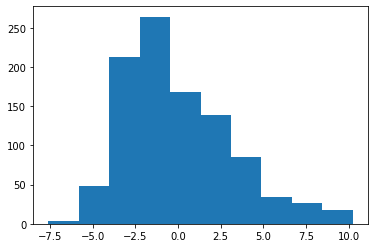

In [35]:
plt.hist(X[0]) #plotting x=0 on a different graph

In [36]:
X = GPU_data(X) #stores information above into x and y
Y = GPU_data(Y)

In [37]:
def softmax(x): #defining softmax to take vector of numbers and turn into vector of probabilities.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [38]:
def cross_entropy(outputs, labels): #cross entropy is used to take possibilities and understand distance to truth       
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #Truncated normal numbers size

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): #something to do with truncated numbers and softmax
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [39]:
X.shape #shape of x img size

torch.Size([50, 1000])

In [40]:
def get_batch(mode): #gets code from above and develops y/x
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [41]:
def model(x,w): #define model as (x,w)

    return x@w[0]

In [ ]:
def make_plots(): #plotting batch test
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #inputs for batch test and model to display x and y in a range
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/